In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pymc3 as pm
import theano
import numpy as np

np.random.seed(42)
pm.set_tt_rng(42)

/home/nilavro/irleak/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# A Simple Mixture Model

In [2]:
w = pm.floatX([.2, .8])
mu = pm.floatX([-.3, .5])
sd = pm.floatX([.1, .1])

with pm.Model() as model:
    x = pm.NormalMixture('x', w=w, mu=mu, sd=sd, dtype=theano.config.floatX)
    x2 = x ** 2
    sin_x = pm.math.sin(x)

In [ ]:
with model:
    pm.Deterministic('x2', x2)
    pm.Deterministic('sin_x', sin_x)

Average Loss = 2.2413: 100%|██████████| 10000/10000 [00:02<00:00, 3567.81it/s]
Finished [100%]: Average Loss = 2.2687


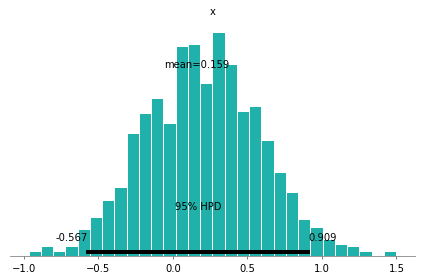

In [3]:

with model:
    mean_field = pm.fit(method='advi')
    
    
pm.plot_posterior(mean_field.sample(1000), color='LightSeaGreen');
